# Case 19 - Support Vector Machines

## Business Problem

You are an analyst at a Colombian EPS. This company has identified a lot of problems arising from people developing heart deseases. So, the company has decided to build a model capable of classifying the risk that a patient has of developing these deseases.

## Introduction

Support vector machines are an application of the maximum margin classifier for non-linear classification boundaries. In this module, we will talk about what the maximal margin classifier is and how support vector machines apply this concept.

## Maximal margin classifier

For a $m$-dimensional space, a hyperplane is a flat subspace of dimension $m-1$. For example, for a two-dimensional space, a hyperplane would be a flat one-dimensional space (a line). In a three-dimensional space, a hyperplane would be a flat two-dimensional space (a plane). For a $p$-dimensional space, a hyperplane can be mathematically defined by the equation: <center>$\beta_0 +\beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p =0$ </center> 

Every point $X=(X_1,X_2,...,X_p)$ that satisfies that equation lies in the hyperplane. Now, there are an infinite number of points that do not satisfy that equation. One way that a point can not satisfy the equation is if: <center>$\beta_0 +\beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p > 0$ </center>  

which means that $X$ is on one side of the hyperplane. However, $X$ can be on the other side of the hyperplane if: <center>$\beta_0 +\beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p < 0$ </center>

which means that a hyperplane can separate a $m$-dimensional space into two parts. Using this concept, it is natural to think about hyperplanes that can help to separate observations that are from two different classes. However, there can be multiple hyperplanes that are able to perfectly separate observations that come from two different classes, as it can be seen in the following figure:

<figure>
<img src="/work/indu5012_case_19/fig/Hyperplane_Separation.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 19.1 - Multiple hyperplanes that separate observations that come from two different classes </b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>

If observations that were from one class had a value of 1 on their output variable ($y_i=1$), and the other ones had a -1 ($y_i=-1$), then all of those hyperplanes that separate the observations from both classes would be ones that satisfy the following inequalities: <center>$\beta_0 +\beta_1x_{1i} + \beta_2x_{2i} < 0 \  \text{if} \  y_i=-1 $ </center> <center>$\beta_0 +\beta_1x_{1i} + \beta_2x_{2i} > 0 \ \text{if} \  y_i=1 $ </center>

As the chosen hyperplane is the decision boundary that separates observations from different classes, if an observation is far from the hyperplane, then one would be confident about the classification of said observation. However, if the observation is very close to the decision boundary, then the classsification would be made with much less confidence. The minimal distance that there is between an observation and the separating plane is known as the margin. On that account, if there could be multiple separating hyperplanes, the one that is preferred is the one that maximizes the margin, i.e. the **maximal margin classifier**. This maximal margin classifier will be the mid-line between the widest block that one can insert between observations of the two classes. On that account, the creation of the maximal margin classifier will only depend on the arrangement of the observations from different classses that are the closest to each other.

<figure>
<img src="/work/indu5012_case_19/fig/Maximal_margin_classifier.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 19.2 - Example of a maximal margin classifier </b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>

Now, in order to create the maximal margin classifier, the following optimization problem has to be solved: <center>$\text{Maximize} M$ </center> <center>$\text{subject to:}$ </center> <center>$\sum_{j=1}^m{\beta_j^2}=1$ </center> <center>$y_i(\beta_0 +\beta_1x_{1i} + \beta_2x_{2i} + ... +\beta_mx_{mi} )>M \  \forall i \in \{1,2,...,n\}$ </center>

While the first restriction does not affect the definition of the hyperplane, it makes it so the minimal distance (perpendicular distance) between the hyperplane and an observation is given by $y_i(\beta_0 +\beta_1x_{1i} + \beta_2x_{2i} + ... +\beta_mx_{2m} )$. Hence, the previous optimization problem will look to maximize the margin $M$. The previous problem can be solved efficiently to then obtain the maximal margin classifier.

## Support Vector Classifier

However, the previous optimization problem can only be solved if the observations from different classes can be perfectly separated. So, when the observations are not separable, i.e. there is no possible solution for the parameters vector $\beta$ manages to result in a margin $M>0$. For the case in which observations cannot be separated, a hyperplane that almost separates the two classes will be created by using a soft margin. 

By using a soft margin, which allows some of the observations to be on the wrong side of the margin, the model will not have the objective to perfectly classify all of the observations but to be able to classify confidently most of the observations. The previous feature makes it so the model is much more robust when individual observations are added. To put this into perspective, take a look at how a maximal margin classifier can change when adding only one new observation:

<figure>
<img src="/work/indu5012_case_19/fig/Maximal_margin_classifier_variance.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 19.3 - Example of how a maximal margin classifier can change when adding a new observation. The panel on the right shows how the classifier from the panel on the left can change when adding a new observation from the blue class</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>

In order to create the new hyperplane to classify the observations using a soft margin, the following optimization problem is solved: <center>$\text{Maximize} M$ </center> <center>$\text{subject to:}$ </center> <center>$\sum_{j=1}^m{\beta_j^2}=1$ </center> <center>$y_i(\beta_0 +\beta_1x_{1i} + \beta_2x_{2i} + ... +\beta_mx_{mi} )>M(1-\epsilon_i) \  \forall i \in \{1,2,...,n\}$ </center> <center>$\epsilon_i \geq 0 \forall i \in \{1,2,...,n\}, \sum_{i=1}^n \epsilon_i \leq C$  </center>

where $C$ is a tuning paramter that has to be determined by the analyst. As in the maximal margin classifier, the optimization problem tries to determine the hyperplane that has a maximal margin $M$. However, this new problem introduces the slack variables $\epsilon_1,\epsilon_2,...,\epsilon_n$. When the slack variable for the $i^{th}$ observation is equal to 0 ($\epsilon_i=0$), then the observation will be on the correct side of the margin. If $0<\epsilon_i \leq 1$, then the $i^{th}$ is on the wrong side of the margin. Additionally, if $1<\epsilon_i$, then the $i^{th}$ observation is on the wrong side of the hyperplane.

On that account, the parameter $C$ is a measure of how much the margin can be violated by the $n$ observations in the training set. If $C=0$, then no observation can violate the margin and the maximal margin classifier would be computed. If, $C>0$, then no more than $C$ observations can be on the wrong side of the hyperplane. On that account, when $C$ increases, there will be a higher tolerance for observations to violate the margin, and so the margin will increase.

The best parameter $C$ is chosen in practice by the cross-validation process, as it is the key parameter that regulates the bias-variance trade-off of a support vector classifier. When C is small, we seek narrow margins that are rarely violated; this results in  a classifier that is highly fit to the data, which may have low bias but high variance. On the other hand, when C is larger, the margin is wider as we allow more violations to it; this amounts to
fitting the data less hard and obtaining a classifier that is potentially more biased but may have lower variance.

When solving the last optimization problem, it turns out that only observations that either lie on the margin or that
violate the margin will affect the hyperplane, and hence the classifier obtained. In other words, an observation that lies strictly on the correct side of the margin does not affect the support vector classifier. Changing the position of that observation would not change the classifier at all, provided that its position remains on the correct side of the margin. Observations that lie directly on the margin, or on the wrong side of the margin for their class, are known as **support vectors**. These observations are the ones that do affect the support vector classifier.


As only support vectors affect the classifier, when the tuning parameter C is large, then the margin is wide, many observations violate the margin, and so there are many support vectors. In this case, many observations are involved in determining the hyperplane, which means that the classifier has low variance (since many observations are support vectors) but it has a potentially high bias. In contrast, if C is small, then there will be fewer support vectors and hence the resulting classifier will have low bias, but a high variance.

<figure>
<img src="/work/indu5012_case_19/fig/Support_vector_classifier.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 19.4 - Example of  support vector classifiers with different values for the parameter C</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>

## Support Vector Machines

Even though the support vector classifier is able to find a hyperplane that separates classes for cases in which observation for both classes are non-separable, this classifier is useless when the decision boundary is non-linear. The following example shows how a support vector classifier is not useful when the decision boundary is non-linear.  

<figure>
<img src="/work/indu5012_case_19/fig/Support_vector_classifier_non-linear.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 9.5 - Support vector classifier when the decision boundary is non-linear</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>

In order to address the non-linearity, the input space can be expanded by using quadratic or cubic terms. For intstance, rather than using the $m$ original input variables, one can use the following $3m$ input variables: $X_1,X_1^2,X_1^3,X_2,X_2^2,X_2^3,...,X_m,X_m^2,X_m^3$. With this enlarged input space, the optimization problem to find the separating hyperplane can be expressed as: <center>$\text{Maximize} M$ </center> <center>$\text{subject to:}$ </center> <center>$\sum_{j=1}^m\sum_{k=1}^3{\beta_{jk}^2}=1$ </center> <center>$y_i(\beta_0 +\sum_{j=1}^m\beta_{j1}x_{ji} +\sum_{j=1}^m\beta_{j2}x_{ji}^2 +\sum_{j=1}^m\beta_{j3}x_{ji}^3 )>M(1-\epsilon_i) \  \forall i \in \{1,2,...,n\}$ </center> <center>$\epsilon_i \geq 0 \forall i \in \{1,2,...,n\}, \sum_{i=1}^n \epsilon_i \leq C$  </center>

This will result in a non-linear hyperplane of the form $f(x)=0$. Another way in which one might want to expand the input space might be with the interaction between two input variables $X_iX_j$, $i \neq j$. As there are many ways to expand the input space non-linearly, this process might lead to inefficient computations. However, the support vector machine allows us to enlarge the input space by making efficient computations.

In order to make the computation of the hyperplane on the expanded input space, the inner products of the observations is what is needed. The inner product between two observations is defined as: <center> $\langle x_i\,,x_{i^*}\rangle = \sum_{j=1}^m x_{ij}x_{i^*j}$ </center> 

It can be shown that the support vector classifier can be expressed as: <center> $f(x)=\beta_0 + \sum_{i=1}^n \alpha_i \langle x\,,x_{i}\rangle$ </center> 

where the parameters $\alpha_i$, $i=1,...,n$ are fitted for every observation. To estimate the parameters $\alpha_1,...,\alpha_n$ and $\beta_0$ all that is needed are the ${n \choose 2}$ inner products between all of the observations. However, the parameters $\alpha_i$ will have a non-zero value only for observations in the support vector of the solution. So if $S$ is the collection of indices of these support points, we can rewrite any solution function as: <center> $\beta_0 + \sum_{i\in S} \alpha_i \langle x\,,x_{i}\rangle$ </center> 

Which are fewer terms that what was on the previous summation. 

Now as the inner products of pairs of observations appear in $f(x)$, let us replace the inner product with a generalization of it of the form: <center>$K(x_i, x_{i^*})$</center>

where $K$ is some function that we will refer to as a kernel. A kernel is a kernel function that quantifies the similarity of two observations. For instance, we
could simply take <center>$K(x_i, x_{i^*})= \sum_{j=1}^m x_{ij}x_{i^*j}$</center>

which would just give us back the support vector classifier. This kernel is known as a linear kernel because the support vector classifier is linear in the features. The linear kernel essentially quantifies the similarity of a pair of observations using Pearson (standard) correlation. But one could use a different kernel to compute the classifier. For example, one could use the kenrel of the form <center>$K(x_i, x_{i^*})= (1+\sum_{j=1}^m x_{ij}x_{i^*j})^d$</center>

This kernel is known as a polynomial kernel of degree $d$. Using this kernel with $d>1$ will lead to a more complex decision boundary than when using the linear kernel. Using this kernel is tantamount to fitting a support vector classifier on a higer-dimensional space involving polynomials of degree $d$ instead of the original feature space. When a support vector classifier is combined with a non-linear kernel, then the classifier is called support vector machine. When having a support vector machine, the non-linear function will be of the form: <center> $f(x)=\beta_0 + \sum_{i=1}^n \alpha_i K(x\,,x_{i})$ </center> 

Now, the polynomial kernel is not the only non-linear kernel available; there is also, for example, the radial kernel, which is written as the form <center>$K(x_i, x_{i^*})= exp(-\gamma\sum_{j=1}^m (x_{ij}-x_{i^*j})^2)$</center>

where $\gamma$ is a positive constant. Notice that if an observation $x^*=(x_1^*,x_2^*,...,x_m^*)$ is far from another observation $x_i$ in terms of Euclidean distance, then  $\sum_{j=1}^m (x_{j}^*-x_{i^*j})^2$ will be large and $x_i$ will have a small effect on $f(x^*)$. Therefore, as the predicted class label for the test observation $x^*$ is based on the sign of $f(x^*)$. In other words, training observations that are far from $x^*$ will play essentially no role in the predicted class label for $x^*$. This means that the radial kernel has a very local behavior, in the sense that only nearby training observations have an effect on the class label of a test observation.

The results that one can get using the polynomial and radial kernels on the previous example can be seen on the following image:

<figure>
<img src="/work/indu5012_case_19/fig/Polynomial_radial_kernels.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 9.6 - Support vector machine with a polynomial kernel (on the left) and with a radial kernel (on the right)</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>


### SVM for multi-class classification problems

In order to extend the svm model to problems in whch there are $K$ classes multiple approaches have been proposed. However, the most commonly used ones have been the one-versus-one approach and the one-versus-all approach. The one-versus one approach consists on fitting $m \choose 2$ svm models in which only a pair of classes are considered. With these models, an observation is classified as coming from one of the two classes that are being considered. After doing this classification with all of the $m \choose 2$ models, then the observation will be classified as coming from the class that repeated the most on the classification from all of the models.

The one-versus-all approach is another procedure for applying SVMs in the case of $K > 2$ classes. We fit $K$ SVMs, each time comparing one of all the $K$ classes to the remaining $K - 1$ classes. Let $β_{0k}, β_{1k},..., β_{mk}$ denote the parameters that result from fitting an SVM comparing the $k^{th}$ class (coded as +1) to the others (coded as −1). Let $x^*$ denote a test observation. We assign the observation to the class for which $β_{0k}+ β_{1k}x_1^*+...+ β_{mk}x_m^*$ is largest, as this amounts to a high level of confidence that the test observation belongs to the $k^{th}$ class rather than to any of the other classes.

### Packages Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  RocCurveDisplay

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier


### Data Import

The information was downloaded from a dataset available [online](https://biolincc.nhlbi.nih.gov/studies/framcohort/).

In [2]:
df_heart_disease = pd.read_csv('/work/indu5012_case_19/data/framingham.csv')
df_heart_disease.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


### EDA and Data Cleaning

In [3]:
#Droping education column
df_heart_disease.drop(columns='education',inplace=True)

#Droping the observations that have at least one missing value
df_heart_disease.dropna(axis=0,inplace=True)

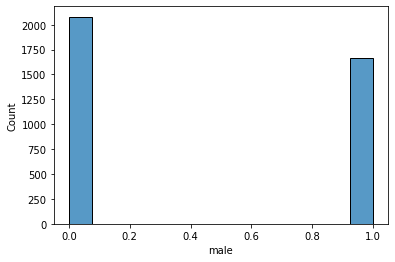

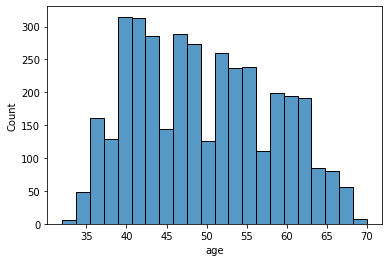

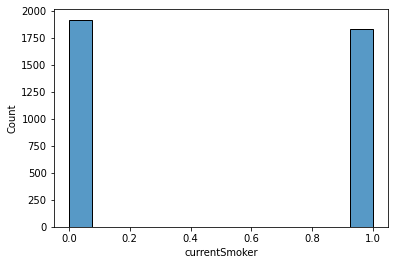

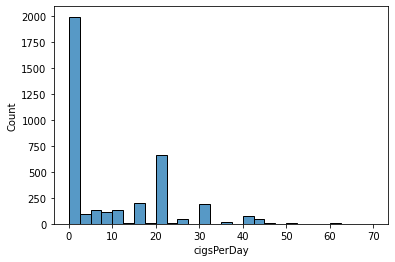

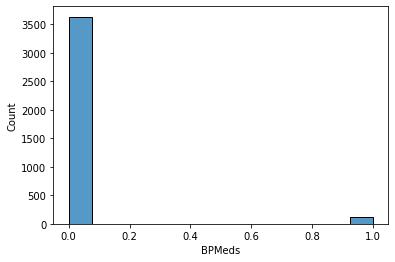

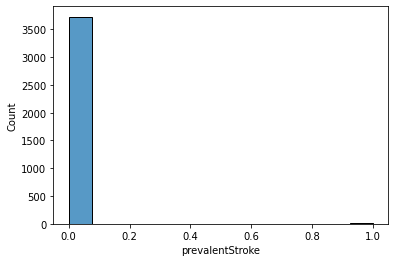

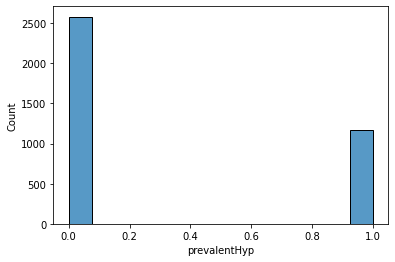

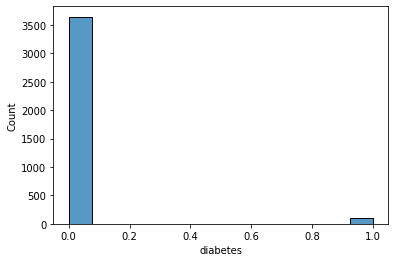

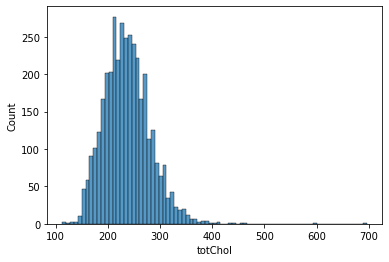

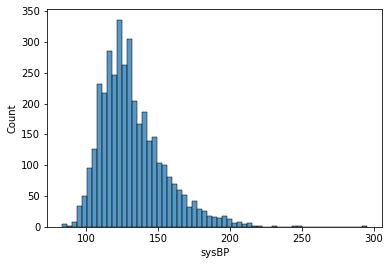

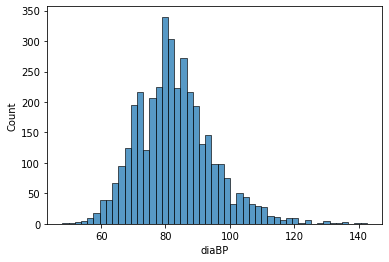

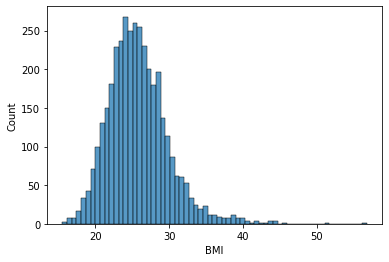

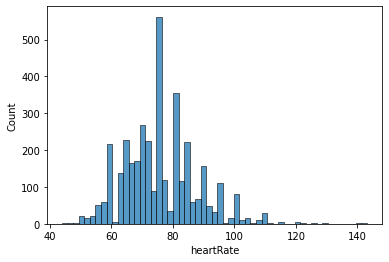

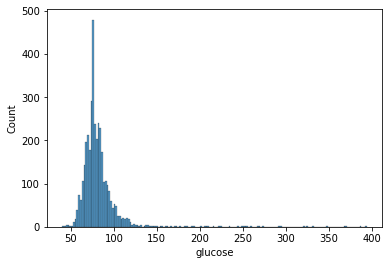

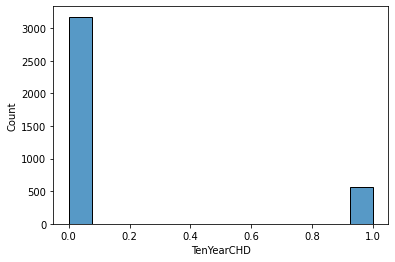

In [4]:
for column in df_heart_disease.columns:
    sns.histplot(x= column,data = df_heart_disease)
    plt.show()

In [5]:
df_heart_disease_No = df_heart_disease[df_heart_disease['TenYearCHD']==0].sample(n=600,random_state=2)
df_heart_disease_Yes = df_heart_disease[df_heart_disease['TenYearCHD']==1]
df_heart_disease_sample = pd.concat([df_heart_disease_No,df_heart_disease_Yes],axis=0)
df_heart_disease_sample = df_heart_disease_sample.sample(frac = 1)
df_heart_disease_sample.reset_index( drop=True, inplace=True)
df_heart_disease_sample.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,52,0,0.0,0.0,0,0,0,235.0,129.5,83.0,28.86,65.0,79.0,1
1,0,57,0,0.0,1.0,0,1,0,432.0,153.0,85.0,26.13,98.0,75.0,1
2,0,36,1,20.0,0.0,0,0,0,177.0,115.0,63.5,22.54,71.0,73.0,0
3,0,40,1,15.0,0.0,0,0,0,220.0,131.5,82.5,24.35,80.0,78.0,0
4,1,49,1,50.0,0.0,0,0,0,252.0,156.0,91.0,25.35,70.0,114.0,1


### Train - Test Split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df_heart_disease_sample.drop(columns='TenYearCHD'), df_heart_disease_sample['TenYearCHD'] , test_size=0.2, random_state=555555555)

### Model Fitting

In [7]:
#Defining model
svc = SVC()

#Fitting model
svc_res = svc.fit(X_train, Y_train)

### Model validation metrics

In [8]:
scores = cross_val_score(svc, X_train, Y_train, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: ",scores.mean())

scores = cross_val_score(svc,  X_train, Y_train, cv=10, scoring='recall')
print("Recall: ",scores.mean())

scores = cross_val_score(svc,  X_train, Y_train, cv=10, scoring='roc_auc')
print("Roc_auc: ",scores.mean())

[0.62765957 0.65957447 0.56382979 0.67021277 0.61702128 0.61702128
 0.71276596 0.64516129 0.60215054 0.68817204]
Accuracy:  0.6403568977350721
Recall:  0.5357712765957447
Roc_auc:  0.7055967927647764


#### Model Adjustments

In [9]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc = SVC()

grid = GridSearchCV(svc, param_grid, scoring='recall', cv=20)

grid.fit(X_train, Y_train)

# Best estimators
print("Best SVC parameters: ",grid.best_estimator_)
print('Best SVC recall score: %.3f' % np.abs(grid.best_score_))

Best SVC parameters:  SVC(kernel='linear')
Best SVC recall score: 0.681


#### Model Testing

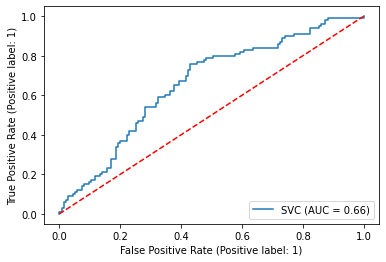

In [10]:
svc = SVC(kernel='linear')
svc_res = svc.fit(X_train, Y_train)

RocCurveDisplay.from_estimator(svc_res, X_test, Y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

### Model Comparision

In [11]:
lda = LinearDiscriminantAnalysis(shrinkage=0.99, solver='lsqr')
lda_res = lda.fit(X_train,Y_train)

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc_res = dtc.fit(X_train, Y_train)

rfc = RandomForestClassifier(max_depth=110, max_features=5, min_samples_leaf=4,min_samples_split=10, n_estimators=10)
rfc_res = rfc.fit(X_train, Y_train)


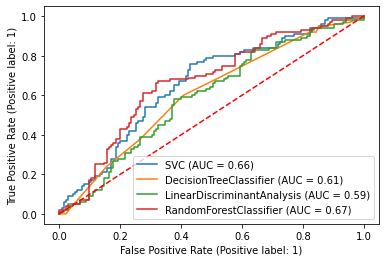

In [12]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(svc_res, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(dtc_res, X_test, Y_test, ax = ax)
RocCurveDisplay.from_estimator(lda_res, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(rfc_res, X_test, Y_test, ax = ax)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>